<p>This Dataset originally contained 37 columns and 126312 rows. Only 5 columns had numerical values including the 2 date columns while the rest of the columns were categorical data.</p>
<p>There were many columns which were not contributing to the Analysis. I dropped some columns. And imputed the columns having missing values for efficient analysis.<br>The number of rows of data showed the overall opportunities from 2018 to 2024. All these opportunities were not successful. A large number of these opportunities were lost. This resulted in a lost of quantity as well as a drop in Sales. 
</p>
I analysed the Opportunities which were won seperately so that I could understand which Industry and what Industry products, Industry Size had many opportunities won, because the won opportunities are responsible for analysing sales.

The Lost opportunities were two times more than the Won Opportunities. This means that there were a lot of reasons for this mainly including the Product Prices and others. But the main reason was not mentioned, thus understanding the main reason for the opportunities lost is unknown yet.

But the Automotive Industry was the one with max sales compared to other Industry. Grneral Engineering Jobs Works had the order for max quantity.

So these are the two industries which should be mainly focussed for effiecient sales. But these industries were the main focus already, but the opportunities lost by them are also maximum. So it is important to improve their production for improving sales.



**The main thing I have analysed in this EDA is Lost opportunity vs Won Opportunity. Reasons for Loss of Opportunity, Industry,Industry Product,Segment winning Opportunity, Monthly sales of every Industry**

In [17]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
df = pd.read_excel('D:\evaluation\ADL - T & M Opportunity (FY19 to 30th Sep 24).xlsx')
# pd.options.display.max_columns =30
df.head(2)

<>:1: SyntaxWarning: invalid escape sequence '\e'
<>:1: SyntaxWarning: invalid escape sequence '\e'
C:\Users\devteam\AppData\Local\Temp\ipykernel_16488\2915582797.py:1: SyntaxWarning: invalid escape sequence '\e'
  df = pd.read_excel('D:\evaluation\ADL - T & M Opportunity (FY19 to 30th Sep 24).xlsx')


,Supplier,Zone,Region,Branch,Location,Opp createdon,Customer name,salesstage,Categiry,Competitor,...,Productionunit,Customopportunityid,price list,Competitormachinetype,Opportunity Source,Opportunitytype,Probability,Revisedorderexpecteddate,Subproduct,Industry Size
0,ACE,West-1,Maharashtra,Thane,Navi Mumbai,2019-06-14,Chinmay Precision Works P.Ltd.,Close,Sales,Not mentioned,...,ACE UNIT,ACE112462,J 300 LM - Fanuc Price List For India-20213705...,NaN,Visit by Sales Engineer,General,75,NaN,Job Work - General Engineering,Small Enterprises > 5 Crores and < 50 Crores
1,ACE,North,North - 2,Faridabad,Faridabad,2019-05-14,Harshna Enterprises,Close,Sales,Not mentioned,...,ACE UNIT,ACE111558,APOLLO - Fanuc Price List For India-2019192102...,NaN,Visit by Sales Engineer,General,60,NaN,Miscellaneous Parts,Micro Enterprises < 5 Crores


In [19]:
df.columns

Index(['Supplier', 'Zone', 'Region', 'Branch', 'Location', 'Opp createdon',
       'Customer name', 'salesstage', 'Categiry', 'Competitor',
       'Customersegment', 'Industry', 'Industryproduct', 'Industrytype',
       'Machine Series', 'MMTsalesstage', 'Quantity', 'Offer type',
       'Lost reason', 'Segment', 'Supplier product', 'Owner/Engineer',
       'Value In Cr', 'Opportunitycancelreason', 'Status', 'Closed date',
       'Opp ID', 'Productionunit', 'Customopportunityid', 'price list',
       'Competitormachinetype', 'Opportunity Source', 'Opportunitytype',
       'Probability', 'Revisedorderexpecteddate', 'Subproduct',
       'Industry Size'],
      dtype='object')

In [20]:
print('Number of rows:',df.shape[0])
print('Number of columns:',df.shape[1])

Number of rows: 126312
Number of columns: 37


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126312 entries, 0 to 126311
Data columns (total 37 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   Supplier                  126312 non-null  object        
 1   Zone                      126310 non-null  object        
 2   Region                    126310 non-null  object        
 3   Branch                    126310 non-null  object        
 4   Location                  126309 non-null  object        
 5   Opp createdon             126312 non-null  datetime64[ns]
 6   Customer name             126312 non-null  object        
 7   salesstage                119525 non-null  object        
 8   Categiry                  126312 non-null  object        
 9   Competitor                126312 non-null  object        
 10  Customersegment           126312 non-null  object        
 11  Industry                  126312 non-null  object        
 12  In

Combining the three fields of office branch into a single column for understanding the office location better.

In [22]:
df['office location'] = df[['Zone', 'Region', 'Branch']].fillna('').agg(', '.join, axis=1)
df.insert(1, 'office location', df.pop('office location'))
df.drop(columns=['Zone','Region','Branch'],inplace = True)
df.head(2)

,Supplier,office location,Location,Opp createdon,Customer name,salesstage,Categiry,Competitor,Customersegment,Industry,...,Productionunit,Customopportunityid,price list,Competitormachinetype,Opportunity Source,Opportunitytype,Probability,Revisedorderexpecteddate,Subproduct,Industry Size
0,ACE,"West-1, Maharashtra, Thane",Navi Mumbai,2019-06-14,Chinmay Precision Works P.Ltd.,Close,Sales,Not mentioned,New - Competitor Customer,Job Work - General Engineering,...,ACE UNIT,ACE112462,J 300 LM - Fanuc Price List For India-20213705...,NaN,Visit by Sales Engineer,General,75,NaN,Job Work - General Engineering,Small Enterprises > 5 Crores and < 50 Crores
1,ACE,"North, North - 2, Faridabad",Faridabad,2019-05-14,Harshna Enterprises,Close,Sales,Not mentioned,Repeat - Lost Customer,Automotive,...,ACE UNIT,ACE111558,APOLLO - Fanuc Price List For India-2019192102...,NaN,Visit by Sales Engineer,General,60,NaN,Miscellaneous Parts,Micro Enterprises < 5 Crores


In [23]:
df['office location'].value_counts()

office location
West-1, Gujarat, Rajkot            9717
West-1, Maharashtra, Thane         8544
South, Karnataka, Peenya           6840
West-1, Gujarat, Ahmedabad         6767
North, North - 1, Ghaziabad        6175
                                   ... 
, ,                                   2
South, CP-West Region, Belgaum        2
South, Coimbatore, Trichy             1
West-1, Maharashtra, Jaysingpur       1
North, North - 1, Faridabad           1
Name: count, Length: 78, dtype: int64

Data preprocessing::
The column 'salesstage' is redundant to 'Status', so it can be dropped.
Since the Category is only 'sales', 'Categiry' column can be dropped.
Competitor is mostly Not mentioned.It doesnt help with sales data analysis part.Offer Type is also not necessary.
OpportunityCancelReason is almost null and doesnt help with analysis as Lost Reason contains the necessary data.  

In [24]:
df.drop(columns=['salesstage','Categiry','Competitor','Offer type','Opportunitycancelreason'],inplace=True)

Since the column 'Value In Cr' is necessary for analysing Sales value, replacing the null values with 0.0.
Supplier having null values are dropped directly.

In [25]:
df['Value In Cr'].fillna(0.0, inplace=True)

df['Supplier'].dropna()

C:\Users\devteam\AppData\Local\Temp\ipykernel_16488\429848178.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Value In Cr'].fillna(0.0, inplace=True)


0         ACE
1         ACE
2         ACE
3         ACE
4         ACE
         ... 
126307    ACE
126308    ACE
126309    ACE
126310    ACE
126311    ACE
Name: Supplier, Length: 126312, dtype: object

In [26]:
df.groupby(['Supplier']).agg({'Quantity':np.sum}).reset_index()

C:\Users\devteam\AppData\Local\Temp\ipykernel_16488\2191832625.py:1: FutureWarning: The provided callable <function sum at 0x00000224B4F01C60> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df.groupby(['Supplier']).agg({'Quantity':np.sum}).reset_index()


,Supplier,Quantity
0,ACE,119165
1,AMS,60506


ACE has more opportunity orders.But these may be Lost/Won/Open until now.
So based on the status of the opportunities, it is a better option to sepearately do analysis for Won and Lost opportunities to understand the main reasons for its acceptance or rejection.
The column 'Status' contains whther the opportunity is Won/Lost/Open.

Repeated customers is being found.Most of these repeated customers are expecting Automation Industry products.This gives us an idea that Automation industry is an important industry in terms of sales.

In [ ]:
repeat_opportunities = df.groupby(['Customer name', 'Industry'])['Opp ID'].nunique()

repeat_opportunities = repeat_opportunities[repeat_opportunities > 1].sort_values(ascending=False)

print("Customers with Repeat Opportunities and their Industries:")
print(repeat_opportunities)

Plotting Won vs Lost Orders based on quantity and Revenue.It shows that lost quantity is too high compared to won quantity

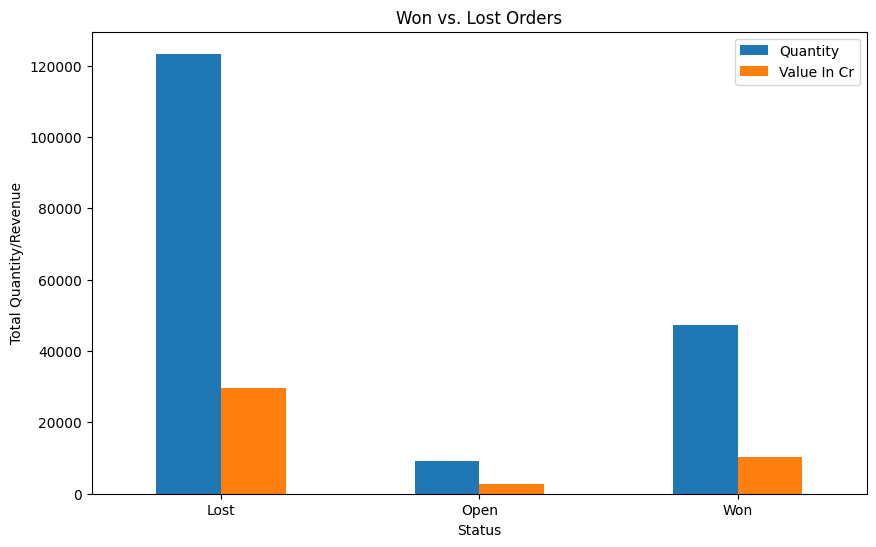

In [42]:
status_summary = df.groupby('Status').agg({'Quantity': 'sum', 'Value In Cr': 'sum'})

status_summary.plot(kind='bar', figsize=(10, 6), title='Won vs. Lost Orders')
plt.ylabel('Total Quantity/Revenue')
plt.xticks(rotation=0)
plt.show()

In [27]:
df['Status'].value_counts()

Status
Lost    86611
Won     32840
Open     6861
Name: count, dtype: int64

This means more than half of the opportunities were lost. When quantity is considered for every opportunity, the sales lost also increases.

C:\Users\devteam\AppData\Local\Temp\ipykernel_16488\2492073224.py:1: FutureWarning: The provided callable <function sum at 0x00000224B4F01C60> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  qtyStatusData = df.groupby(['Status']).agg({'Quantity':np.sum}).reset_index()


([<matplotlib.patches.Wedge at 0x224bbe92900>,
 [Text(-0.607815860046805, 0.9168205278436795, 'Lost'),
  Text(-0.2627553314452313, -1.0681571213061807, 'Open'),
  Text(0.7450923598457857, -0.8092202266994062, 'Won')],
 [Text(-0.3315359236618936, 0.5000839242783706, '68.63%'),
  Text(-0.14332108987921705, -0.5826311570760985, '5.05%'),
  Text(0.4064140144613376, -0.4413928509269488, '26.31%')])

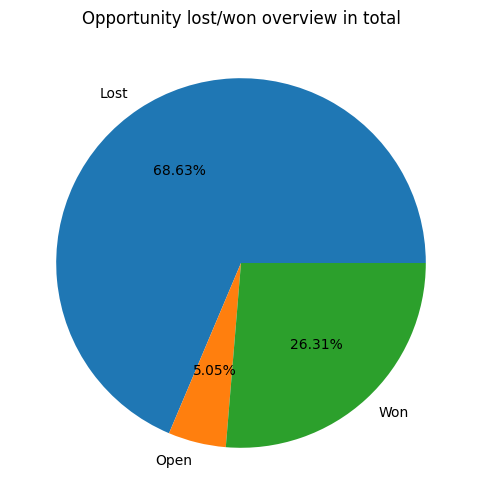

In [28]:
qtyStatusData = df.groupby(['Status']).agg({'Quantity':np.sum}).reset_index()
plt.figure(figsize =(6, 6)) 
plt.title('Opportunity lost/won overview in total')
plt.pie(qtyStatusData.Quantity, labels = qtyStatusData.Status,autopct='%1.2f%%')

The below bargraph shows the status of the opportunity at a particular office based on the quantity.

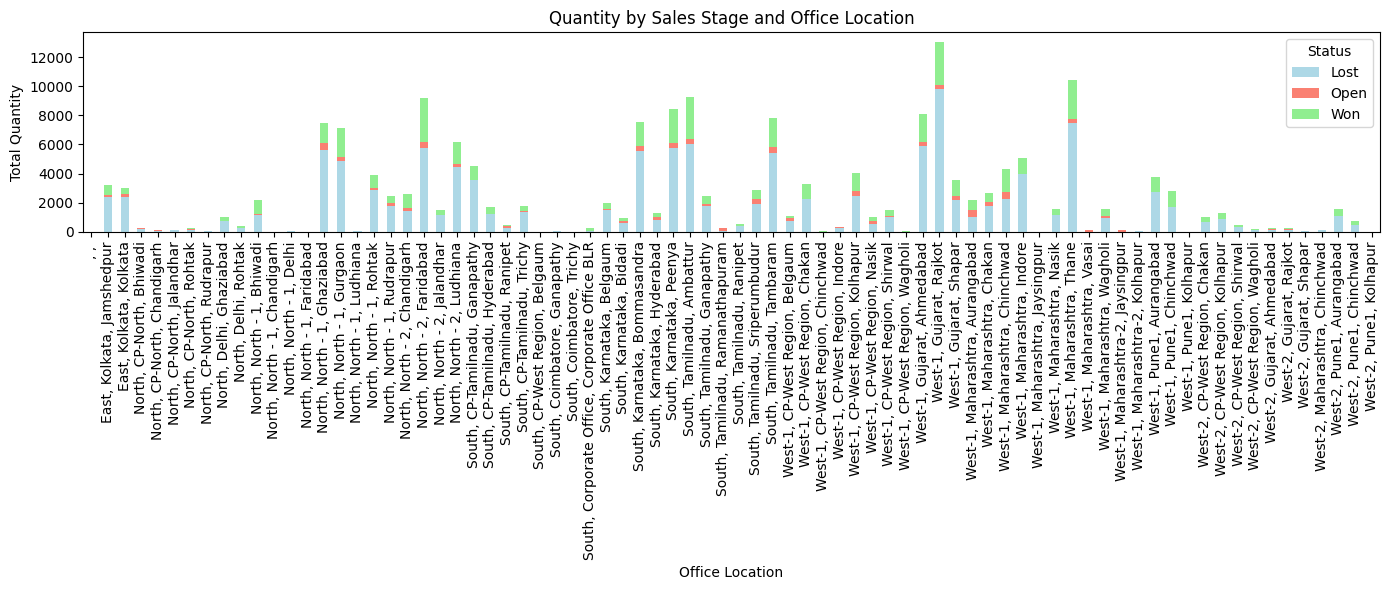

In [29]:
quantity_by_stage_location = df.groupby(['office location', 'Status'])['Quantity'].sum().unstack(fill_value=0)

quantity_by_stage_location.plot(kind='bar', stacked=True, figsize=(14, 6), color=['lightblue', 'salmon', 'lightgreen'])
plt.title('Quantity by Sales Stage and Office Location')
plt.ylabel('Total Quantity')
plt.xlabel('Office Location')
plt.tight_layout()
plt.show()

This plot makes it obvious that most of the opportunities are lost,very few are open and rest are Won. Of all office locations, it seems like Rajkot,Faribad,Thane,Peenya have most of the won opportunities, though they have also lost opportunities

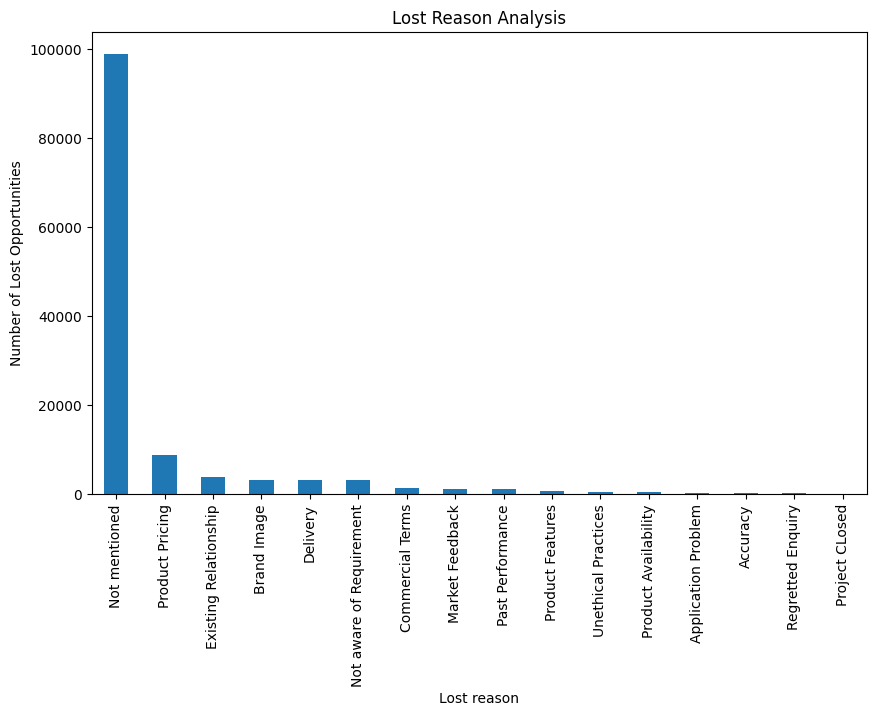

In [30]:
lost_reasons = df['Lost reason'].value_counts()
lost_reasons.plot(kind='bar', title='Lost Reason Analysis', figsize=(10, 6))
plt.ylabel('Number of Lost Opportunities')
plt.show()

Here the most important lost reason is not mentioned. But it also includes the opportunities won. So creating a new dataframe for won opportunities can seperate the analysis of Won and Lost opportunities.

The below graph only includes the reasons for opportunity lost.

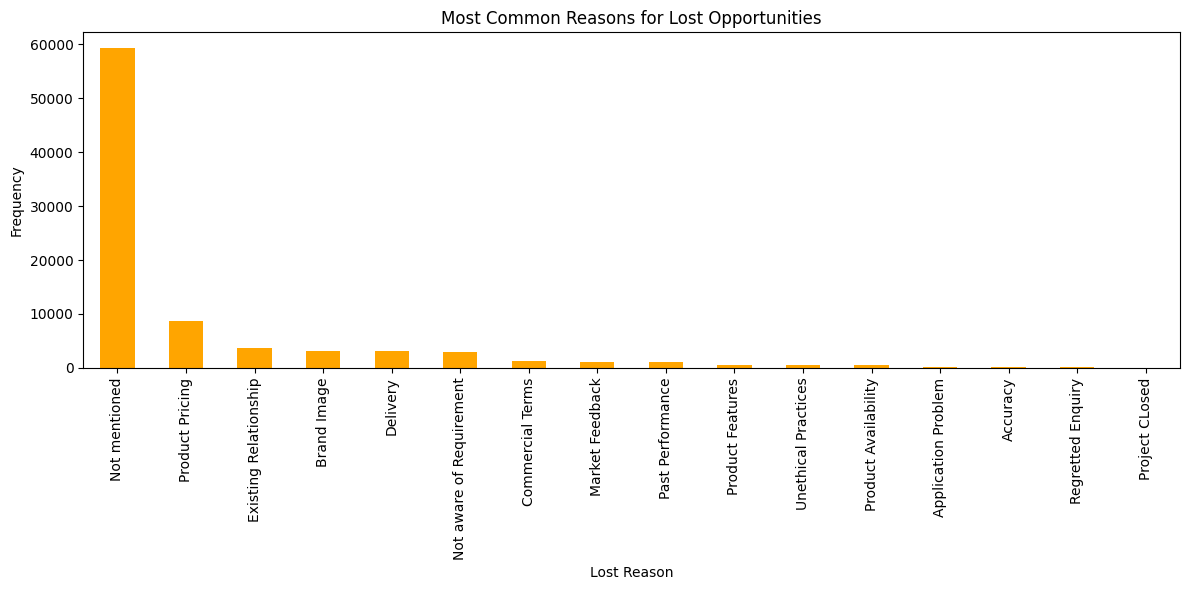

Lost reason
Not mentioned               59288
Product Pricing              8746
Existing Relationship        3724
Brand Image                  3152
Delivery                     3134
Not aware of Requirement     3008
Commercial Terms             1361
Market Feedback              1139
Past Performance             1096
Product Features              571
Unethical Practices           520
Product Availability          464
Application Problem           204
Accuracy                      121
Regretted Enquiry              79
Project CLosed                  4
Name: count, dtype: int64


In [31]:
lost_reason_counts = df[df['Status'] == 'Lost']['Lost reason'].value_counts()

lost_reason_counts.plot(kind='bar', figsize=(12, 6), color='orange')
plt.title('Most Common Reasons for Lost Opportunities')
plt.xlabel('Lost Reason')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

print(lost_reason_counts)

Analysis of Won Opportunity by creating a new dataframe :: To check which opportunities were won, quantity and sales of those opportunities.Thus we will understand the Industry,IndustryProduct,Segment which was able to Win opportunies in max.

C:\Users\devteam\AppData\Local\Temp\ipykernel_16488\1046075099.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  won_trends_start_date = won_orders.resample('M', on='Opp createdon').size()


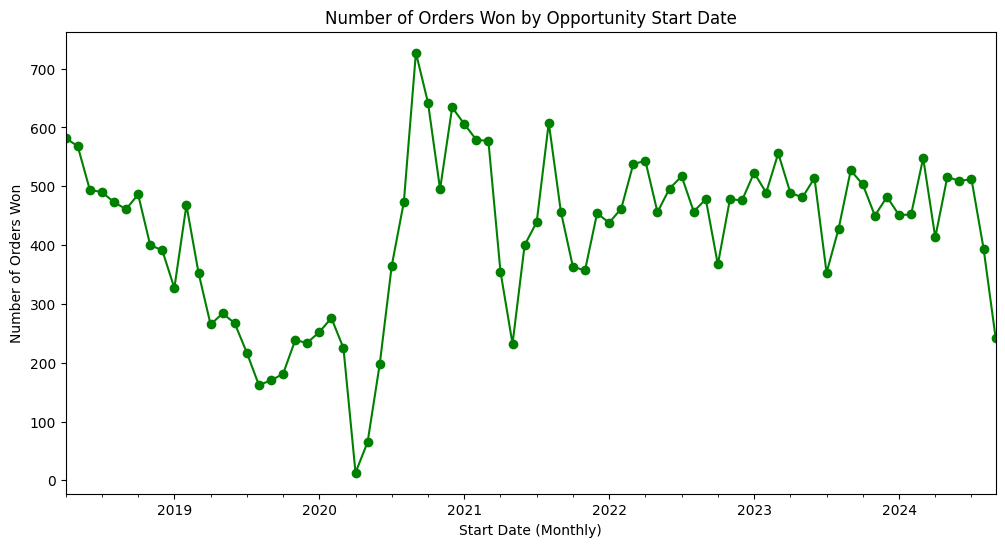

In [44]:
df['Opp createdon'] = pd.to_datetime(df['Opp createdon'])
df['Closed date'] = pd.to_datetime(df['Closed date'])

won_orders = df[df['Status'] == 'Won'][['Supplier','office location','Opp createdon', 'Closed date','Customersegment','Quantity','Value In Cr', 'Industry', 'Industryproduct', 'Segment','Industry Size']]

won_trends_start_date = won_orders.resample('M', on='Opp createdon').size()

plt.figure(figsize=(12, 6))
won_trends_start_date.plot(kind='line', marker='o', color='green')
plt.title('Number of Orders Won by Opportunity Start Date')
plt.xlabel('Start Date (Monthly)')
plt.ylabel('Number of Orders Won')
plt.show()

This shows that 2020 april has the least won opportunities efficiency.But towards the end of 2020 it increased well.Won opportunities number is almost constant from 2022 to 2024.

In [ ]:
print(won_orders[won_orders['office location'] == 'West-1, Gujarat, Rajkot']['Industry'].value_counts())

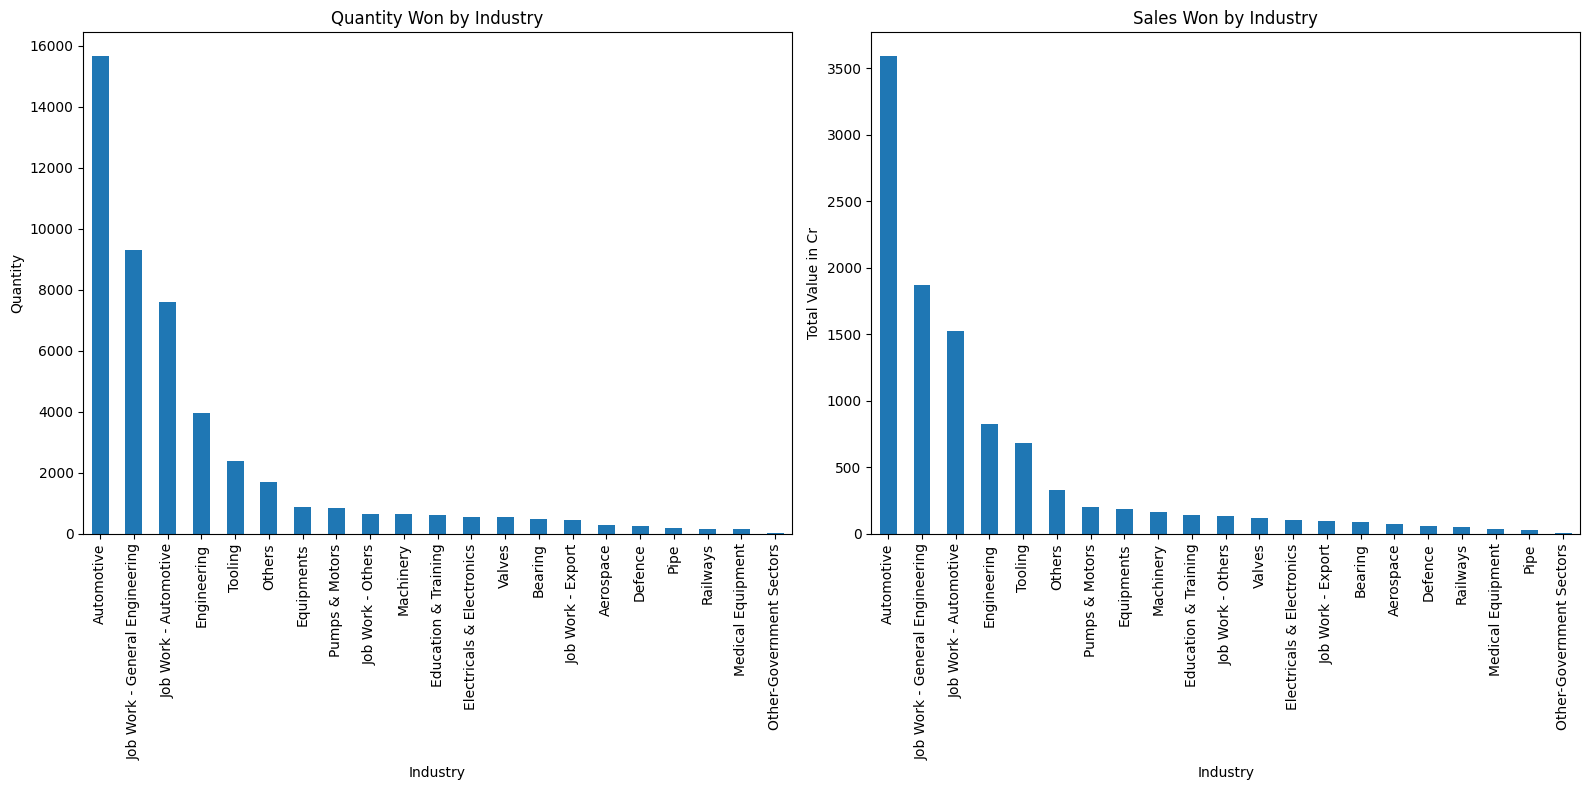

In [33]:
industry_quantity = won_orders.groupby('Industry')['Quantity'].sum().sort_values(ascending=False)
industry_part_sales = won_orders.groupby('Industry')['Value In Cr'].sum().sort_values(ascending=False)

fig, ax = plt.subplots(1, 2, figsize=(16, 8))

industry_quantity.plot(kind='bar', ax=ax[0], title='Quantity Won by Industry')
ax[0].set_ylabel('Quantity')
industry_part_sales.plot(kind='bar', ax=ax[1], title='Sales Won by Industry')
ax[1].set_ylabel('Total Value in Cr')
plt.tight_layout()
plt.show()

Automative was the most opportunity won industry in terms of quantity and sales.

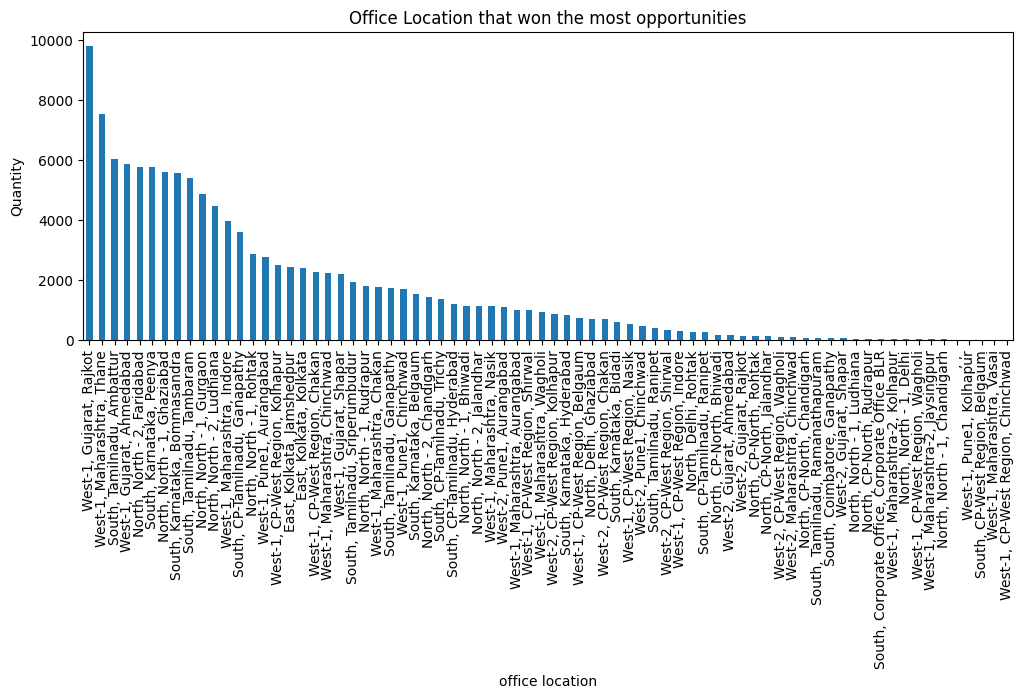

In [60]:
won_by_office_location = won_orders.groupby('office location')['Quantity'].sum().sort_values(ascending=False)

won_by_office_location.plot(kind='bar', title='Office Location that won the most opportunities', figsize=(12, 4))
plt.ylabel('Quantity')
plt.show()

'West-1, Gujarat, Rajkot' has the most won orders.They were mainly focussed on Job Work - General Engineering

In [ ]:
print(won_orders[won_orders['office location'] == 'West-1, Gujarat, Rajkot']['Industry'].value_counts())

Industry
Job Work - General Engineering    2493
Engineering                       1716
Tooling                            448
Equipments                         229
Machinery                          173
Automotive                         141
Job Work - Others                  122
Pumps & Motors                     110
Valves                             101
Job Work - Automotive              101
Medical Equipment                   94
Defence                             67
Electricals & Electronics           62
Job Work - Export                   41
Others                              37
Education & Training                32
Bearing                             15
Aerospace                            7
Railways                             6
Pipe                                 3
Other-Government Sectors             2
Name: count, dtype: int64


In [34]:
segment_sales = won_orders.groupby(['Industry','Segment'])['Value In Cr'].sum().sort_values(ascending=False)
print(segment_sales)

Industry                        Segment                       
Job Work - General Engineering  Job Work - General Engineering    1802.96630
Job Work - Automotive           Job Work - Automotive             1471.17750
Automotive                      Commercial Vehicles               1364.90165
                                2 Wheeler                          795.85550
                                Passenger Vehicles                 764.22400
                                                                     ...    
Defence                         Electronics                          0.15600
Job Work - Automotive           Forging Industry                     0.13550
Job Work - General Engineering  Steel Mills                          0.13150
Equipments                      Forging Industry                     0.09750
Engineering                     Power Tools                          0.00000
Name: Value In Cr, Length: 325, dtype: float64


In [35]:
print(won_orders[won_orders['Industry'] == 'Job Work - General Engineering']['Segment'].value_counts())

Segment
Job Work - General Engineering     7631
Job Work - Automotive                49
Die & Mould                          16
Hydraulic Components                 15
Investment Casting                   11
Tool Room                            11
2 Wheeler                            10
Defence                              10
Aerospace                             9
Commercial Vehicles                   9
Valves                                7
Others-Pump & Motor                   6
Job Work - Export                     5
Passenger Vehicles                    5
Cutting Tool Manufacturer             5
Bearing                               4
Electronics                           4
Foundry                               4
Railways                              3
Others                                3
Tractors                              3
Job Work - Others                     3
Forging Industry                      3
Others-Equipments                     3
Construction Equipment Vehicles 

This means that Automotive Industry has many number of segments similar to 'Job Work - General Engineering' industry. When all their values are combined together they turn out to be most opportunity won industry. All Industries have a number of segments. When compared to all segments,the industry--'Job Work - General Engineering' has the segments where most of the opportunities were won. But the most benefial is Commercial vehicles, as 3390 commercial vehicles gave 1364 crores, whereas 7631 Job Work - General Engineering gave 1802 crores. So vehicles can be considered the main won opportunity.
Thus Automotive Industry had made the most profitable based on sales values. And based on Quantity, Job Work - General Engineering made the most profits.

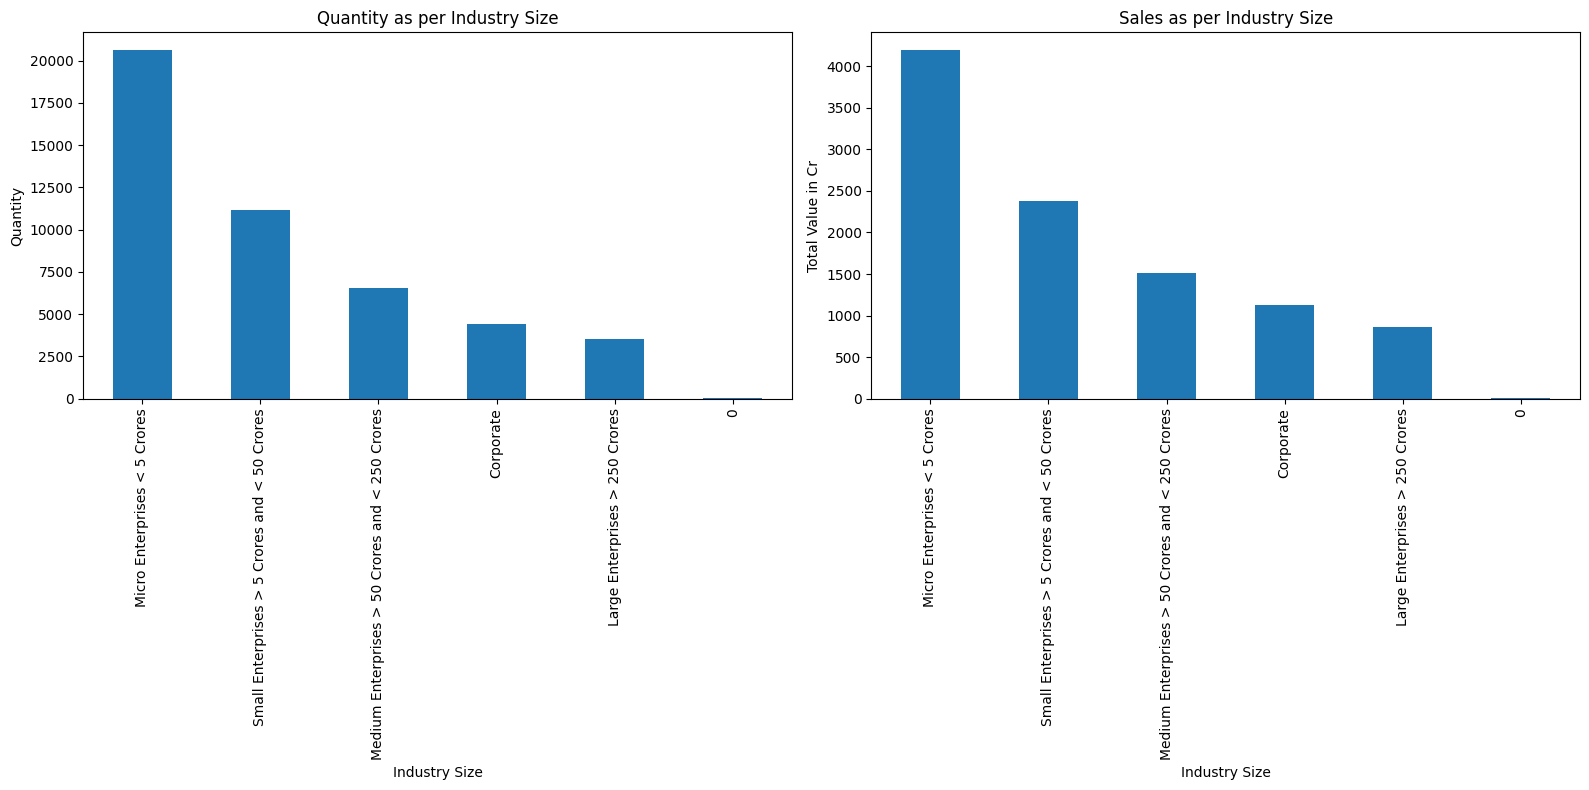

Industry Size
Micro Enterprises < 5 Crores                       4197.883345
Small Enterprises > 5 Crores and < 50 Crores       2374.876300
Medium Enterprises > 50 Crores and < 250 Crores    1511.563600
Corporate                                          1122.743550
Large Enterprises > 250 Crores                      859.663900
0                                                     5.863500
Name: Value In Cr, dtype: float64


In [36]:
industry_size_qty = won_orders.groupby(['Industry Size'])['Quantity'].sum().sort_values(ascending=False)
industry_size_sales = won_orders.groupby(['Industry Size'])['Value In Cr'].sum().sort_values(ascending=False)

fig, ax = plt.subplots(1, 2, figsize=(16, 8))

industry_size_qty .plot(kind='bar', ax=ax[0], title='Quantity as per Industry Size')
ax[0].set_ylabel('Quantity')
industry_size_sales.plot(kind='bar', ax=ax[1], title='Sales as per Industry Size')
ax[1].set_ylabel('Total Value in Cr')
plt.tight_layout()
plt.show()

print(industry_size_sales)

So Micro Enterprises < 5 crores were the ones with most quantity and sales.They have the most won opportunities.

Micro Enterprises < 5 Crores are the industries with Job Work - General Engineering followed by Job Work - Automotive.
Small Enterprises > 5 Crores and < 50 Crores also have Job Work - General Engineering as the dominant industry. Since they have the most opportunities, they have most quantities. Sales is also highest in them because of the quantity.
Medium Enterprises > 50 Crores and < 250 Crores have Automotive as dominant industry.Vehicles fall into this industry category.

So when compared to the industry size, micro industries are beneficial because the quantity expected by them is the most. But when the opportunities with higher sales values is to be expected medium enterprises offer well.

Based on monthly sales, Automatives is the highest. The reason for it is the Value in Cr is highest for them.

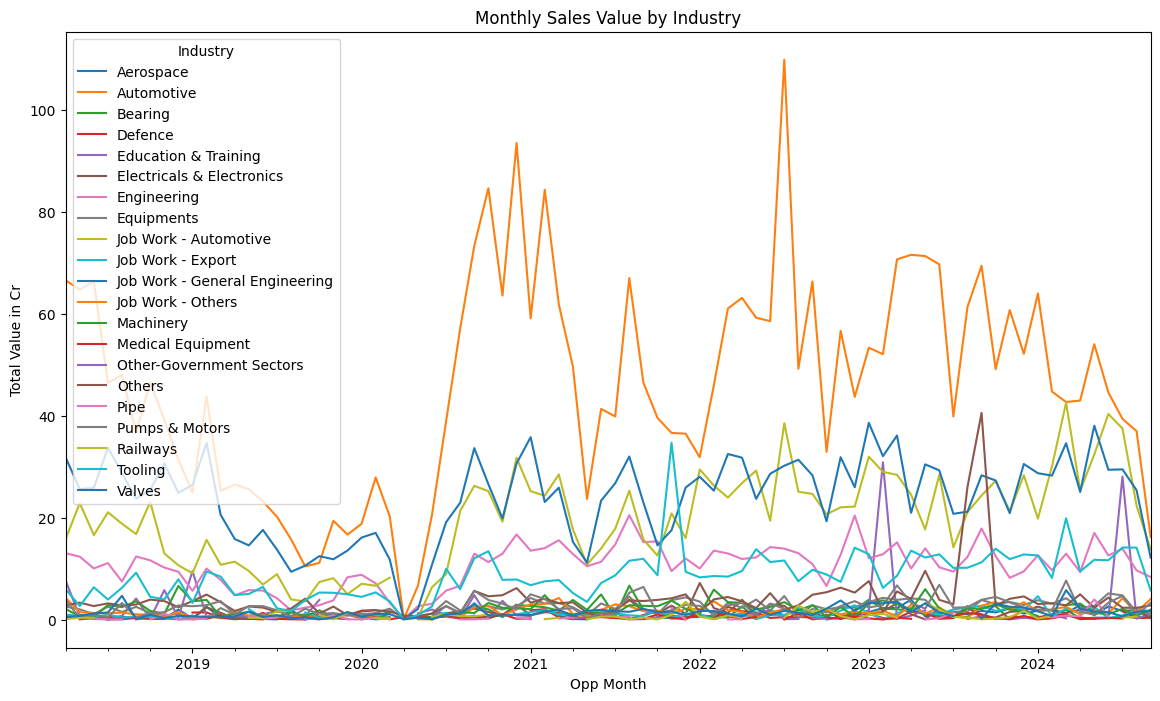

In [38]:
won_orders['Opp Month'] = won_orders['Opp createdon'].dt.to_period('M')
industry_trends = won_orders.pivot_table(values='Value In Cr', index='Opp Month', columns='Industry', aggfunc='sum')
industry_trends.plot(kind='line', figsize=(14, 8), title='Monthly Sales Value by Industry')
plt.ylabel('Total Value in Cr')
plt.show()

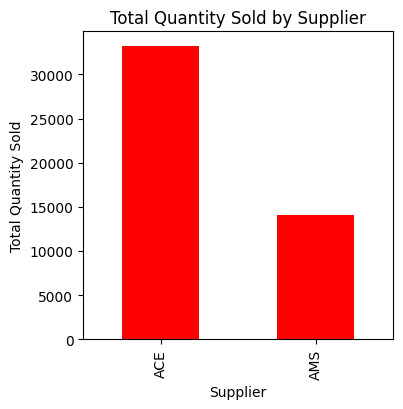

Supplier
ACE    33197
AMS    14079
Name: Quantity, dtype: int64


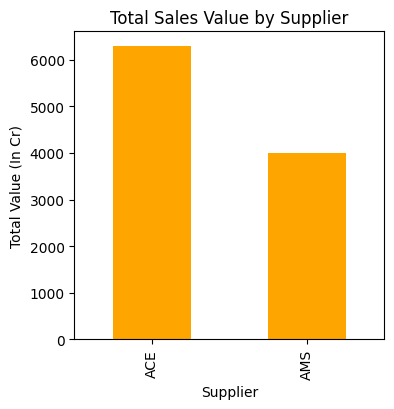

Supplier
ACE    6287.204945
AMS    4005.492750
Name: Value In Cr, dtype: float64


In [39]:
quantity_by_supplier = won_orders.groupby('Supplier')['Quantity'].sum()
quantity_by_supplier.plot(kind='bar', title='Total Quantity Sold by Supplier',color='red', figsize=(4, 4))
plt.ylabel('Total Quantity Sold')
plt.show()
print(quantity_by_supplier)

value_by_supplier = won_orders.groupby('Supplier')['Value In Cr'].sum()
value_by_supplier.plot(kind='bar', title='Total Sales Value by Supplier', color='orange', figsize=(4, 4))
plt.ylabel('Total Value (In Cr)')
plt.show()

print(value_by_supplier)

In [40]:
print(won_orders[won_orders['Supplier'] == 'ACE']['Industry'].value_counts())

print(won_orders[won_orders['Supplier'] == 'AMS']['Industry'].value_counts())

Industry
Job Work - General Engineering    6341
Automotive                        5239
Job Work - Automotive             3950
Engineering                       2142
Others                             681
Tooling                            570
Equipments                         563
Pumps & Motors                     557
Job Work - Others                  438
Valves                             346
Machinery                          339
Electricals & Electronics          322
Job Work - Export                  226
Bearing                            191
Aerospace                          116
Defence                            110
Education & Training                98
Railways                            93
Pipe                                93
Medical Equipment                   72
Other-Government Sectors            13
Name: count, dtype: int64
Industry
Automotive                        3543
Tooling                           1629
Job Work - General Engineering    1508
Job Work - Automotiv

Out of the won opportunities, ACE was the supplier for 33197 opportunities while AMS was for 14079. But the value in Cr generated by AMS is better compared to the quantity sold by them, as they were mainly focussed on automotive industry, and automotive industry(medium sized industry) generated good value. ACE was about Job Work - General Engineering, followed by Automotive. So Automotive is the most won industry overall.

Customer Segment Analysis:: Which customer segment was most satisfied??

Based on the bar plt below, Existing customers were the ones who were satisfied most compared to other customer. New customers were second to the existing customers, which means that a quantity of 10000 was accepted by new buyers.

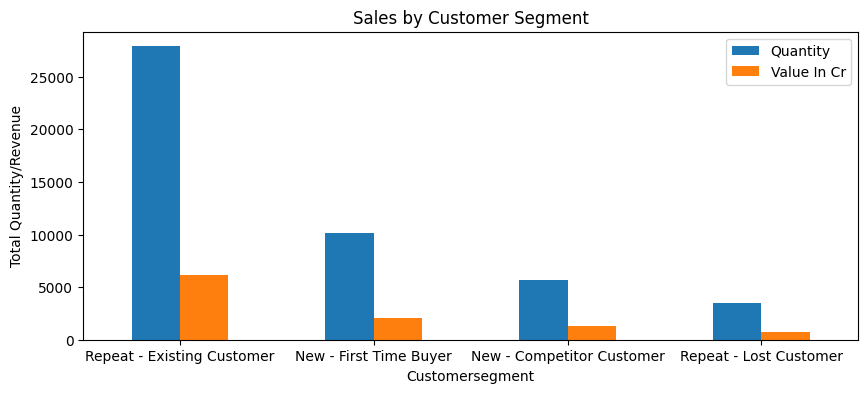

In [ ]:
segment_summary = won_orders.groupby('Customersegment').agg({'Quantity': 'sum', 'Value In Cr': 'sum'}).sort_values(by='Value In Cr', ascending=False)
segment_summary.plot(kind='bar', figsize=(10, 4), title='Sales by Customer Segment')
plt.ylabel('Total Quantity/Revenue')
plt.xticks(rotation=0)
plt.show()


Lost Opportunity analysis::


C:\Users\devteam\AppData\Local\Temp\ipykernel_16488\1840609713.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  lost_trends_start_date = lost_orders.resample('M', on='Opp createdon').size()


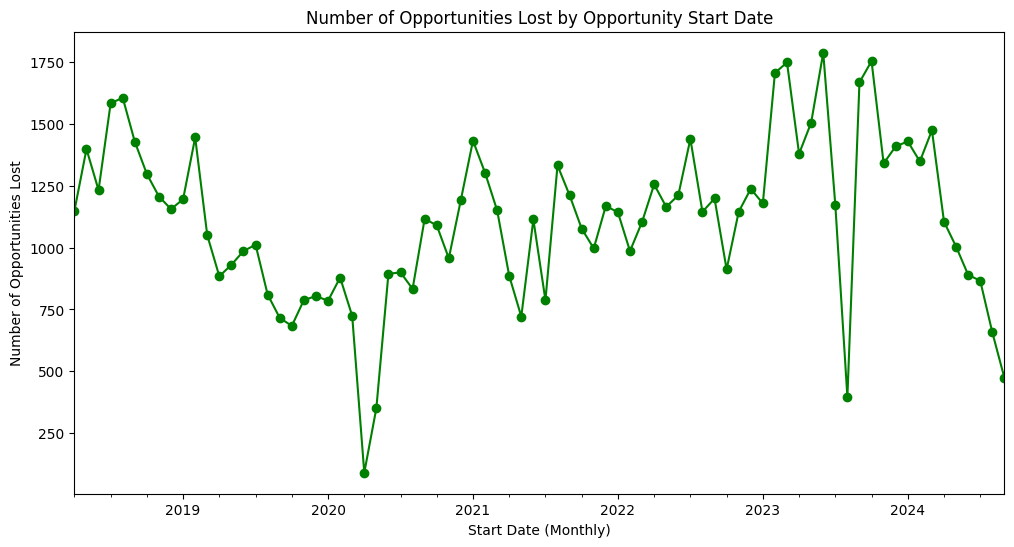

In [51]:
df['Opp createdon'] = pd.to_datetime(df['Opp createdon'])
df['Closed date'] = pd.to_datetime(df['Closed date'])

lost_orders = df[df['Status'] == 'Lost'][['Supplier','office location','Opp createdon', 'Closed date','Customersegment','Quantity','Value In Cr', 'Industry', 'Industryproduct', 'Segment','Industry Size']]

lost_trends_start_date = lost_orders.resample('M', on='Opp createdon').size()

plt.figure(figsize=(12, 6))
lost_trends_start_date.plot(kind='line', marker='o', color='green')
plt.title('Number of Opportunities Lost by Opportunity Start Date')
plt.xlabel('Start Date (Monthly)')
plt.ylabel('Number of Opportunities Lost')
plt.show()

This shows the number of opportunities lost.The number of opportunities lost in mid 2023 was the highest.And was recovered by the second half of 2023. The opportunities lost in 2024 are less becuase most are in Open stage

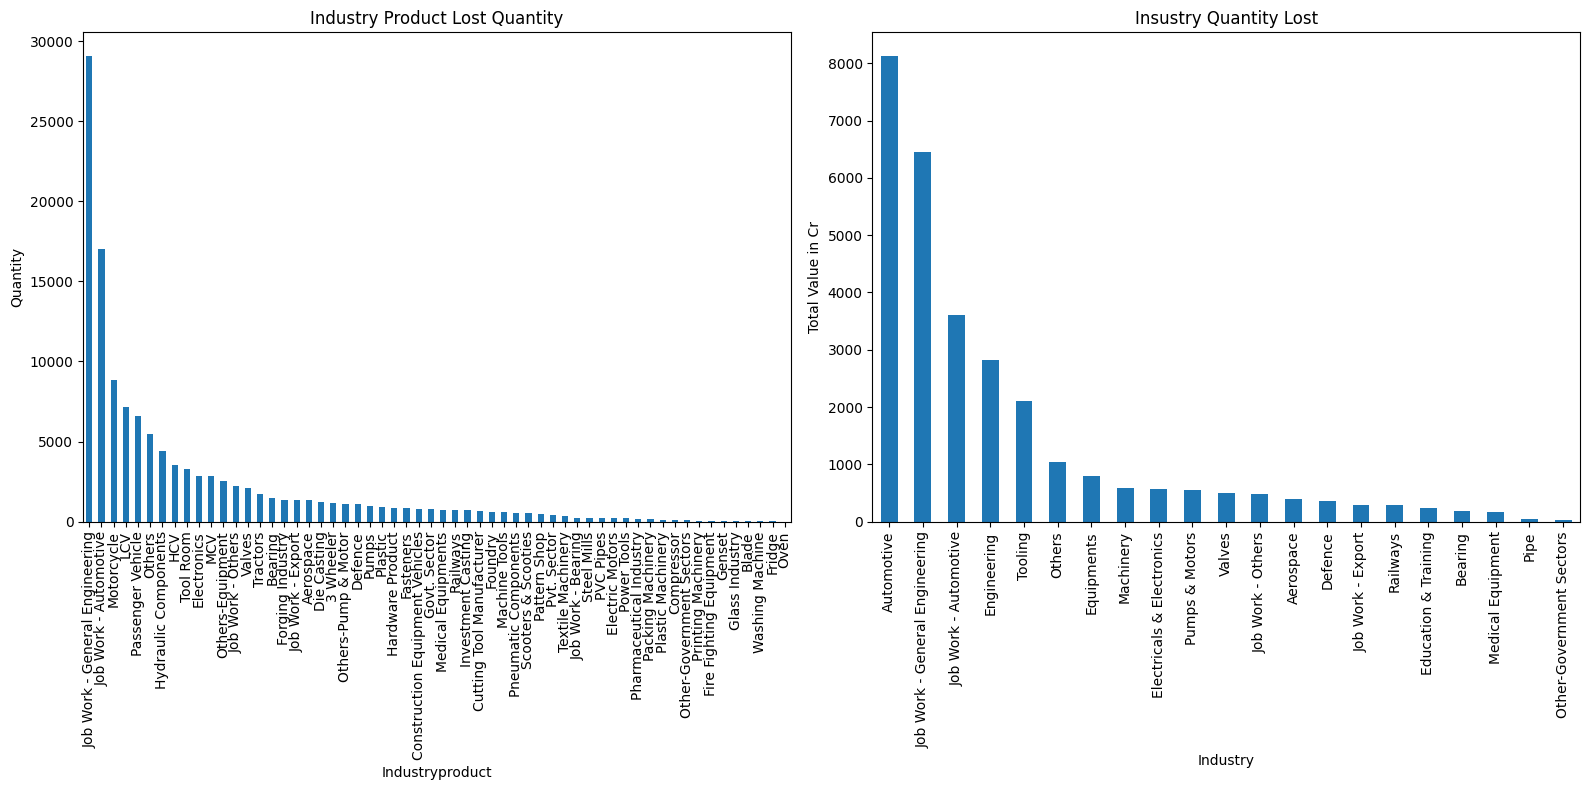

In [71]:
industryProductQty = lost_orders.groupby(['Industryproduct'])['Value In Cr'].sum().sort_values(ascending=False)
industryQty = lost_orders.groupby('Industry')['Value In Cr'].sum().sort_values(ascending=False)

fig, ax = plt.subplots(1, 2, figsize=(16, 8))

industry_quantity.plot(kind='bar', ax=ax[0], title='Industry Product Lost Quantity')
ax[0].set_ylabel('Quantity')
industry_part_sales.plot(kind='bar', ax=ax[1], title='Insustry Quantity Lost')
ax[1].set_ylabel('Total Value in Cr')
plt.tight_layout()
plt.show()

This means that though the opportunities won by the Automotive industry were maximum, the opportunities lost by the Automotive Industry are also high. Thus the sales are affected. Automotive Industry is the industry getting more sales compared to other industries.The second industry i.e Job Work-General Engineering also has good number of quantity for opportunities. This number of opportunities lost by the industry is more compared to Won. So these two industries are responsible for governing the entire Sales Trend.

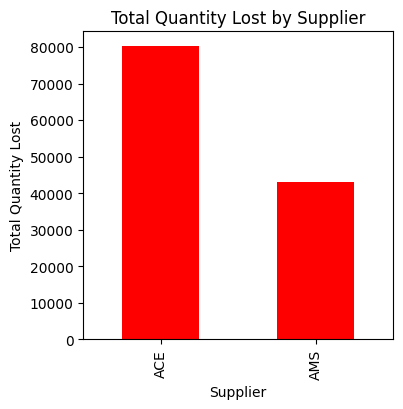

Supplier
ACE    80238
AMS    43079
Name: Quantity, dtype: int64


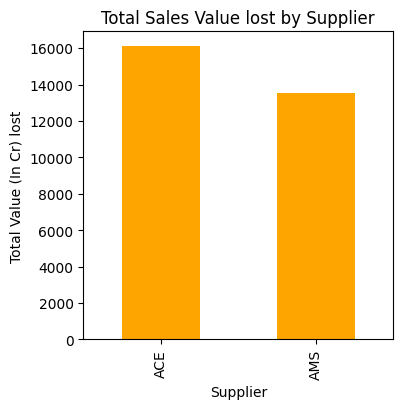

Supplier
ACE    16107.740030
AMS    13544.743421
Name: Value In Cr, dtype: float64


In [56]:
quantity_by_supplier = lost_orders.groupby('Supplier')['Quantity'].sum()
quantity_by_supplier.plot(kind='bar', title='Total Quantity Lost by Supplier',color='red', figsize=(4, 4))
plt.ylabel('Total Quantity Lost')
plt.show()
print(quantity_by_supplier)

value_by_supplier = lost_orders.groupby('Supplier')['Value In Cr'].sum()
value_by_supplier.plot(kind='bar', title='Total Sales Value lost by Supplier', color='orange', figsize=(4, 4))
plt.ylabel('Total Value (In Cr) lost')
plt.show()

print(value_by_supplier)

ACE lost a large number of quantities and Value due to the lost opportunities.Even AMS is not that behind.

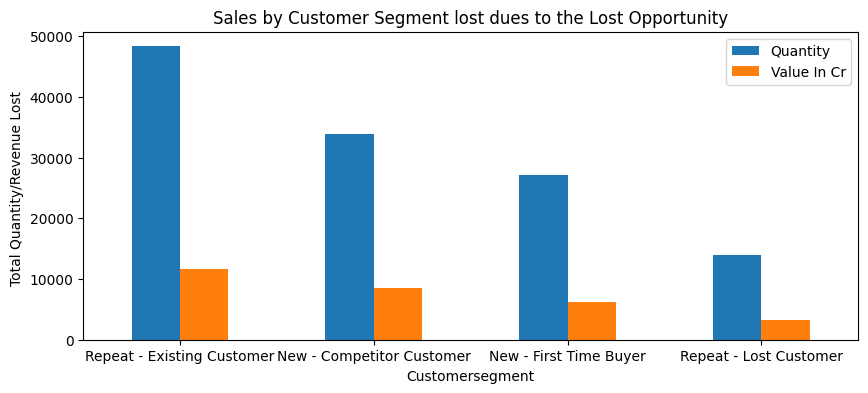

In [58]:
segment_summary = lost_orders.groupby('Customersegment').agg({'Quantity': 'sum', 'Value In Cr': 'sum'}).sort_values(by='Value In Cr', ascending=False)
segment_summary.plot(kind='bar', figsize=(10, 4), title='Sales by Customer Segment lost dues to the Lost Opportunity')
plt.ylabel('Total Quantity/Revenue Lost ')
plt.xticks(rotation=0)
plt.show()

The above plot shows the total quantity and revenue lost due to missed opportunities, with customer segments like "New - Competitor" nd "New - First Time Buyer" showing a high number of lost opportunities. This indicates that new customers may require more effective strategies to convert leads into sales.

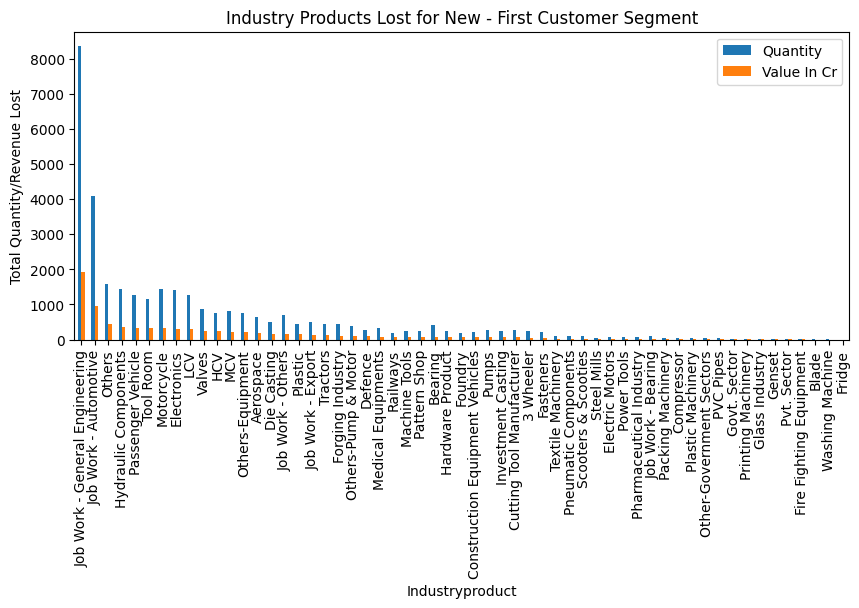

                                 Quantity  Value In Cr
Industryproduct                                       
Job Work - General Engineering       8351   1931.56560
Job Work - Automotive                4093    961.80100
Others                               1569    431.03930
Hydraulic Components                 1450    360.16605
Passenger Vehicle                    1283    340.03700
Tool Room                            1161    338.38860
Motorcycle                           1437    321.69840
Electronics                          1418    298.01150
LCV                                  1274    294.85600
Valves                                881    247.59600
HCV                                   757    246.71130
MCV                                   805    228.94550
Others-Equipment                      755    213.67700
Aerospace                             630    176.37480
Die Casting                           507    159.82050
Job Work - Others                     700    158.35800
Plastic   

In [ ]:
filtered_lost_orders = lost_orders[lost_orders['Customersegment'] == 'New - Competitor Customer']
industry_product_summary = filtered_lost_orders.groupby('Industryproduct').agg({'Quantity': 'sum', 'Value In Cr': 'sum'}).sort_values(by='Value In Cr', ascending=False)

industry_product_summary.plot(kind='bar', figsize=(10, 4), title='Industry Products Lost for New - First Customer Segment')
plt.ylabel('Total Quantity/Revenue Lost')
plt.show()

print(industry_product_summary)


'New Competitive Customer' and 'New First Buyer' were the mostly asking for 'Job Work - General Engineering ' industry product.So this general Engineering Job work can bring in new customers.'Automation Industry' products were mainly focussed by Existing customers

Thus the Automotive Industry helps in increased Sales. Followed by General Engineering Industry.
If the opportunities lost in these industries are reduced,then the sales values can be increased drastically.
